In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

from xgboost.sklearn import XGBClassifier

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data['isFraud'].unique()

array([0, 1], dtype=int64)

In [6]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
len(data['isFraud']==1)

6362620

In [8]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

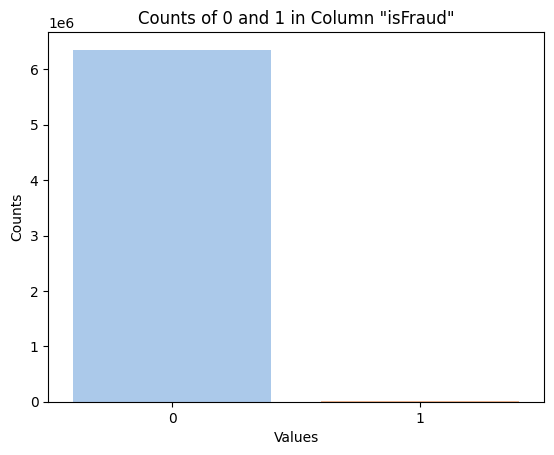

In [9]:
# Plotting with seaborn
sns.countplot(data=data, x='isFraud', palette='pastel')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Counts of 0 and 1 in Column "isFraud"')
plt.show()

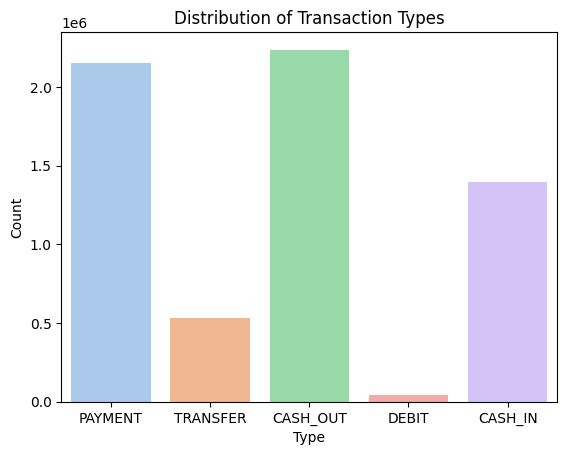

In [10]:
sns.countplot(data=data, x='type', palette='pastel')
plt.title('Distribution of Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

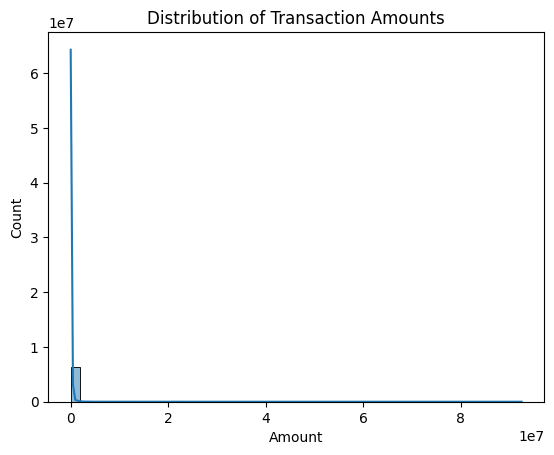

In [11]:
sns.histplot(data=data,x='amount', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

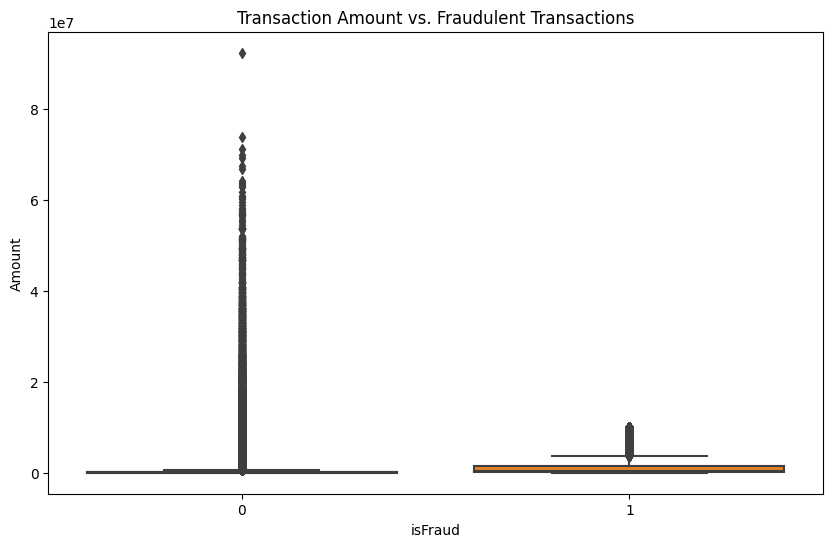

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount vs. Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.show()

In [13]:
data.corr()

C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_24484\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_24484\199175922.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


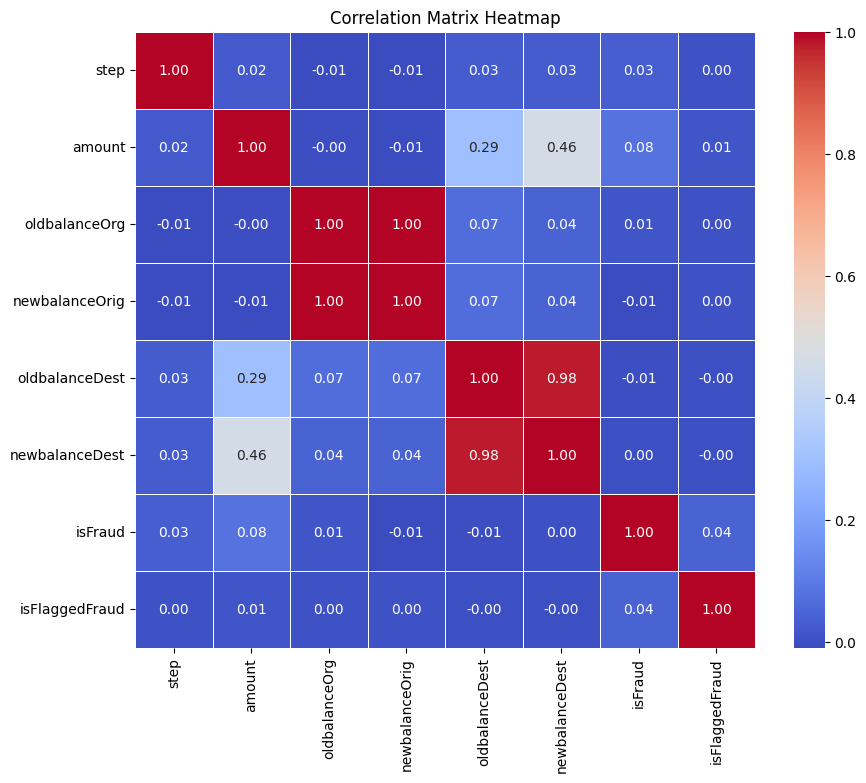

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
df = data

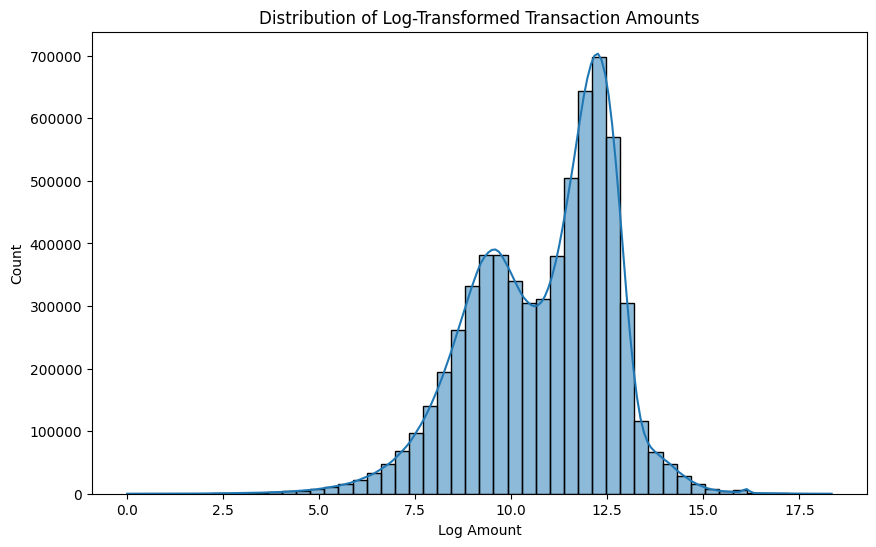

In [16]:
# Apply logarithmic transformation to transaction amounts
df['log_amount'] = np.log1p(df['amount'])

# Plot the histogram of log-transformed transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log Amount')
plt.ylabel('Count')
plt.show()

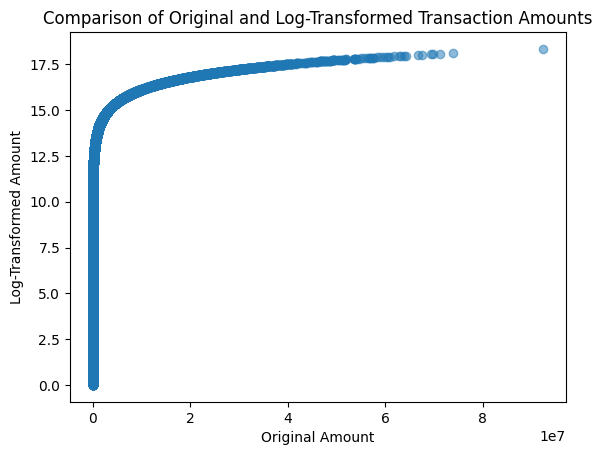

In [17]:
plt.scatter(df['amount'], df['log_amount'], alpha=0.5)
plt.title('Comparison of Original and Log-Transformed Transaction Amounts')
plt.xlabel('Original Amount')
plt.ylabel('Log-Transformed Amount')
plt.show()

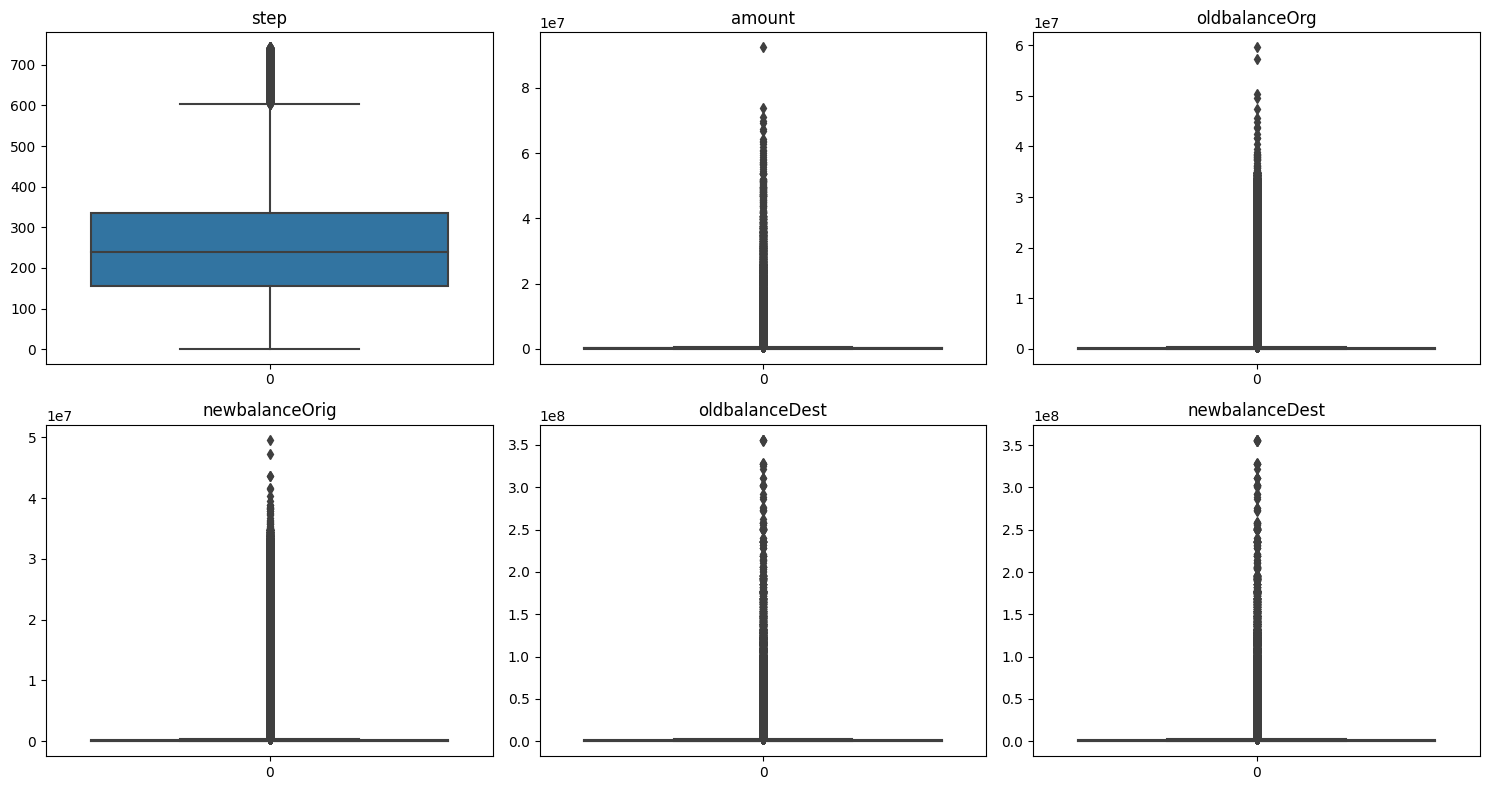

In [18]:
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plot boxplots for each numerical feature to visualize outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

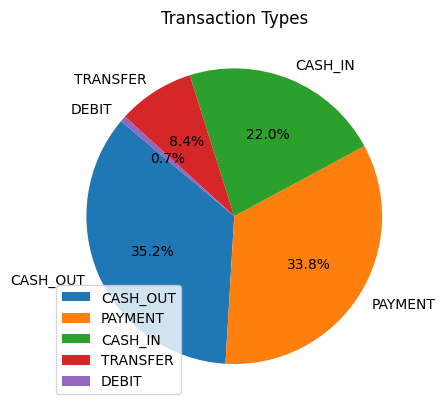

In [20]:
labels = data['type'].value_counts().index
sizes = data['type'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Types')
plt.axis('off')
plt.legend()
plt.show()

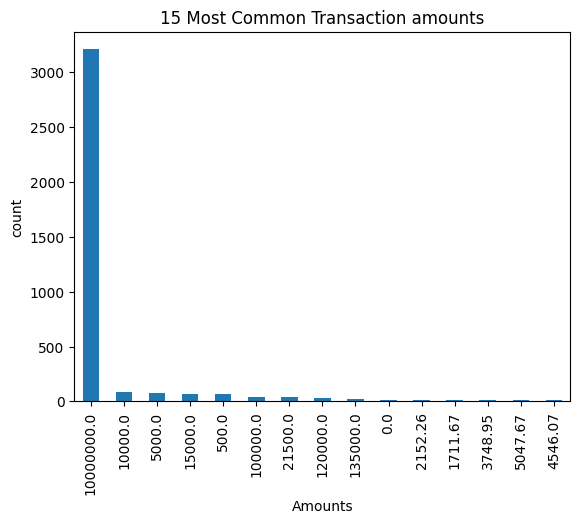

In [21]:
data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts')
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

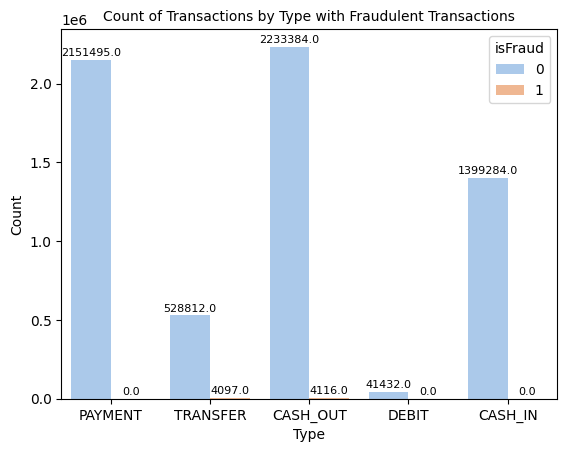

In [22]:
ax = sns.countplot(data=data, x='type', hue='isFraud', palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Transactions by Type with Fraudulent Transactions', fontsize=10)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

From the above graph we can see that only the **TRANSFER** and **CASH_OUT** transaction type has fraudulent transactions

In [23]:
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [24]:
print("TRANSFER Transaction:")
print(f"Minimum Transaction Amount: {dfFraudTransfer.amount.min()}")
print(f"Maximum Transaction Amount: {dfFraudTransfer.amount.max()}")

TRANSFER Transaction:
Minimum Transaction Amount: 63.8
Maximum Transaction Amount: 10000000.0


In [25]:
print("CASH_OUT Transaction:")
print(f"Minimum Transaction Amount: {dfFraudCashout.amount.min()}")
print(f"Maximum Transaction Amount: {dfFraudCashout.amount.max()}")

CASH_OUT Transaction:
Minimum Transaction Amount: 0.0
Maximum Transaction Amount: 10000000.0


Now we take a look at the **Type of Transaction** that are flagged to be fraud

In [26]:
data.loc[data.isFlaggedFraud==1].type.drop_duplicates().values

array(['TRANSFER'], dtype=object)

In [27]:
dfFlaggedFraud = data.loc[(data.isFlaggedFraud==1)]
print(f"No. of Transactions Flagged Fraud: {len(dfFlaggedFraud)}")

No. of Transactions Flagged Fraud: 16


In [28]:
print("Transactions Flagged Fraud:")
print(f"Minimum Transaction Amount: {dfFlaggedFraud.amount.min()}")
print(f"Maximum Transaction Amount: {dfFlaggedFraud.amount.max()}")

Transactions Flagged Fraud:
Minimum Transaction Amount: 353874.22
Maximum Transaction Amount: 10000000.0


As we can see that the frauds are clearly evident in **TRANSFER** Transaction type.
### **Dataset with TRANSFER Transactions**

In [29]:
dfTransfer = data.loc[data.type=='TRANSFER']
dfTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,5.204007
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,12.279840
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,12.649754
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,11.044709
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,10.662268
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0,11.263934
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0,9.754550
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0,11.274250
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0,12.322110
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0,11.743033


We check the **maximum** and **minimum** original balance of transactions that are **flagged fraud**.<br>
Frauds having same balance before and after transaction

**Minimum**

In [30]:
dfTransfer.loc[(dfTransfer.isFlaggedFraud==1)&(dfTransfer.oldbalanceOrg==dfTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,12.776700
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,13.193056
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,14.110419
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,14.748723
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1,14.969585
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1,15.051285
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,15.089839
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1,15.551502


**Maximum**

In [31]:
dfTransfer.loc[(dfTransfer.isFlaggedFraud==1)&(dfTransfer.oldbalanceOrg==dfTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg', ascending=False).head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,16.118096
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,16.075714
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1,16.118096
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1,15.805609
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,16.118096
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1,12.896832
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1,15.551502
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,15.089839


We check the **maximum** and **minimum** original balance of transactions that are **not flagged fraud**.<br>
Frauds having same balance before and after transaction

**Minimum**

In [32]:
dfTransfer.loc[(dfTransfer.isFlaggedFraud==0)&(dfTransfer.oldbalanceOrg==dfTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,11.263934
4288375,307,TRANSFER,55022.40,C1273282170,0.0,0.0,C23150295,400276.22,455298.63,0,0,10.915514
4288407,307,TRANSFER,457738.52,C1761322866,0.0,0.0,C169249144,2481580.12,2939318.64,0,0,13.034056
4288408,307,TRANSFER,489875.28,C1232825614,0.0,0.0,C1649029008,1465953.57,1955828.85,0,0,13.101908
4288409,307,TRANSFER,969612.48,C67612313,0.0,0.0,C2022076763,1277542.87,2100387.85,0,0,13.784653
4288410,307,TRANSFER,1974560.69,C598732283,0.0,0.0,C2100584284,5464492.97,7439053.65,0,0,14.495857
4288411,307,TRANSFER,339999.45,C383389387,0.0,0.0,C1026123218,463934.05,803933.50,0,0,12.736702
4288412,307,TRANSFER,1239804.86,C73073155,0.0,0.0,C1980139879,2157677.13,3397481.99,0,0,14.030465
4288413,307,TRANSFER,4027023.61,C1032914807,0.0,0.0,C1002002601,19200875.02,23227898.64,0,0,15.208538
4288414,307,TRANSFER,2166183.41,C1636693259,0.0,0.0,C1821667317,5322485.63,7488669.05,0,0,14.588478


In [33]:
dfTransfer.loc[(dfTransfer.isFlaggedFraud==0)&(dfTransfer.oldbalanceOrg==dfTransfer.newbalanceOrig)].sort_values(by='oldbalanceOrg',ascending=False).head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
1822,1,TRANSFER,169106.97,C2142129482,575667.54,575667.54,C1170794006,575667.54,22190.99,0,0,12.038293
4288413,307,TRANSFER,4027023.61,C1032914807,0.00,0.00,C1002002601,19200875.02,23227898.64,0,0,15.208538
4288419,307,TRANSFER,748224.40,C1596036107,0.00,0.00,C1802070493,1180034.45,1928258.85,0,0,13.525460
4288418,307,TRANSFER,319459.65,C1078250895,0.00,0.00,C1006387259,5672132.59,5991592.24,0,0,12.674389
4288417,307,TRANSFER,1440965.42,C1324309748,0.00,0.00,C627363214,2233753.61,3674719.03,0,0,14.180825
4288416,307,TRANSFER,15025465.62,C2079344194,0.00,0.00,C2096026497,24270415.78,39295881.40,0,0,16.525257
4288415,307,TRANSFER,23492886.25,C669455271,0.00,0.00,C427072764,25876713.45,49369599.70,0,0,16.972208
4288414,307,TRANSFER,2166183.41,C1636693259,0.00,0.00,C1821667317,5322485.63,7488669.05,0,0,14.588478
4288412,307,TRANSFER,1239804.86,C73073155,0.00,0.00,C1980139879,2157677.13,3397481.99,0,0,14.030465
4288421,307,TRANSFER,297008.72,C312929072,0.00,0.00,C1342395214,2555783.02,2852791.74,0,0,12.601520


**Minimum** and **Maximum** amount of **oldBalanceOrg** for transactions that are **Flagged Fraud**

In [34]:
dfFlaggedFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,14.110419
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,13.193056
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,16.118096


In [35]:
print(f'Minimum Balance of oldBalanceOrg: {dfFlaggedFraud.oldbalanceOrg.min()}')
print(f'Maximum Balance of oldBalanceOrg: {dfFlaggedFraud.oldbalanceOrg.max()}')

Minimum Balance of oldBalanceOrg: 353874.22
Maximum Balance of oldBalanceOrg: 19585040.37


**Minimum** and **Maximum** amount of **oldBalanceOrg** for transactions that are **Not Flagged Fraud** where or newbalance original and oldbalance original are equal.

In [36]:
dfConditionFraud = data.loc[(data.type=='TRANSFER')&(data.isFlaggedFraud==0)&(data.oldbalanceOrg==data.newbalanceOrig)]
dfConditionFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,11.263934
80,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,9.754550
81,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,11.274250
82,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,12.322110
83,1,TRANSFER,125872.53,C1443967876,0.0,0.0,C392292416,348512.00,3420103.09,0,0,11.743033


In [37]:
print(f'Minimum Balance of oldBalanceOrg: {dfConditionFraud.oldbalanceOrg.min()}')
print(f'Maximum Balance of oldBalanceOrg: {dfConditionFraud.oldbalanceOrg.max()}')

Minimum Balance of oldBalanceOrg: 0.0
Maximum Balance of oldBalanceOrg: 575667.54


**Minimum** and **Maximum** amount of **oldBalanceOrg** for transactions that are **Flagged Fraud** where or newbalance original and oldbalance original are equal.

In [38]:
dfConditionNotFraud = data.loc[(data.type=='TRANSFER')&(data.isFlaggedFraud==1)&(data.oldbalanceOrg==data.newbalanceOrig)]
dfConditionNotFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,14.110419
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,13.193056
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,16.118096


In [39]:
print(f'Minimum Balance of oldBalanceOrg: {dfConditionNotFraud.oldbalanceOrg.min()}')
print(f'Maximum Balance of oldBalanceOrg: {dfConditionNotFraud.oldbalanceOrg.max()}')

Minimum Balance of oldBalanceOrg: 353874.22
Maximum Balance of oldBalanceOrg: 19585040.37


In [40]:
data.nameDest.value_counts().head(10)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

#### Making **X** and **Y** Sets

In [41]:
X = data.loc[(data.type=='TRANSFER')|(data.type=='CASH_OUT')]
X.shape

(2770409, 12)

In [42]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,5.204007
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,5.204007
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,12.342066
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,12.279840
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,12.649754


In [43]:
X['errbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_24484\148867153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_24484\148867153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [44]:
X = X.drop(['nameDest', 'nameOrig', 'log_amount'], axis=1)
X.shape

(2770409, 11)

In [45]:
X['type'].replace('TRANSFER',0,inplace=True)
X['type'].replace('CASH_OUT',1,inplace=True)

In [46]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errbalanceOrig,errbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [47]:
X.isnull().any()

step              False
type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
errbalanceOrig    False
errbalanceDest    False
dtype: bool

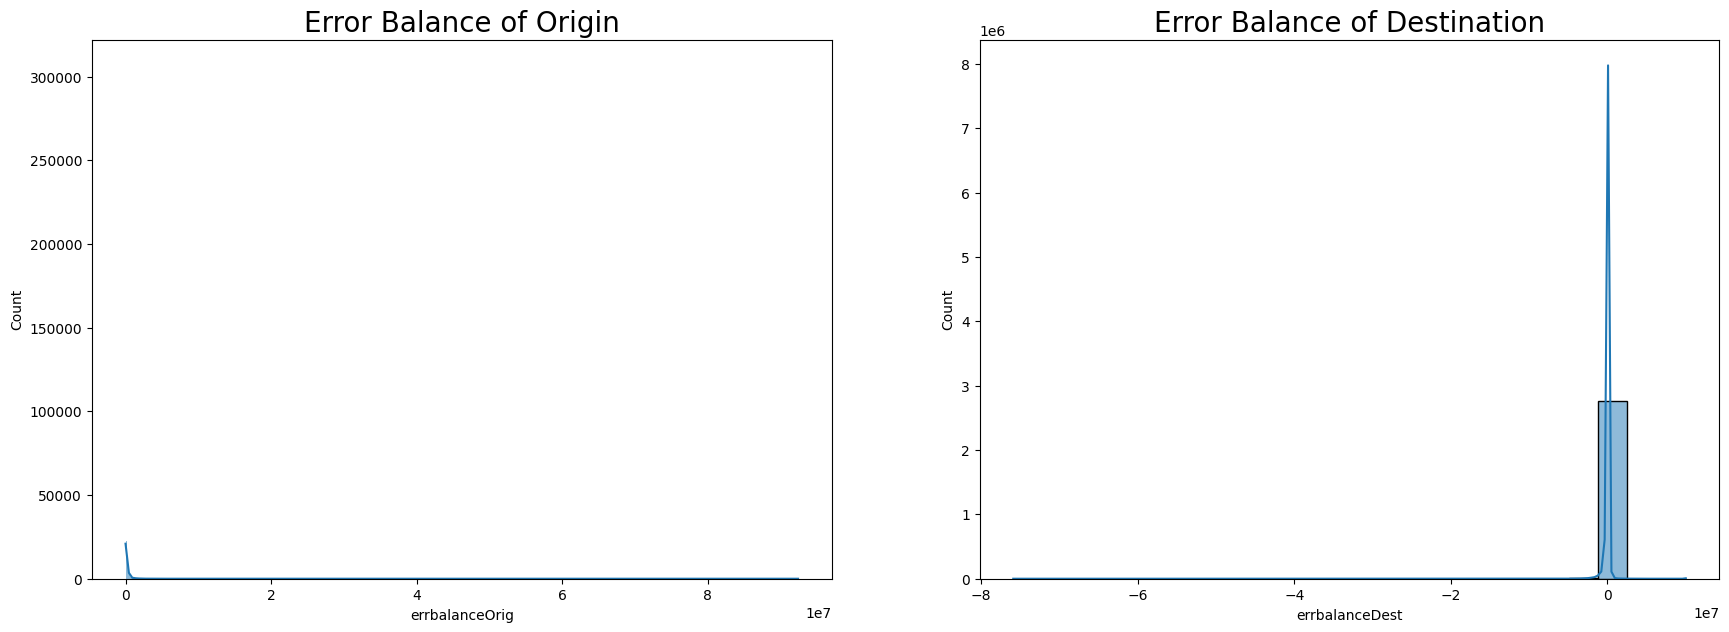

In [48]:
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.histplot(X['errbalanceOrig'], kde=True)
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.histplot(X['errbalanceDest'], kde=True)
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

In [49]:
X.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

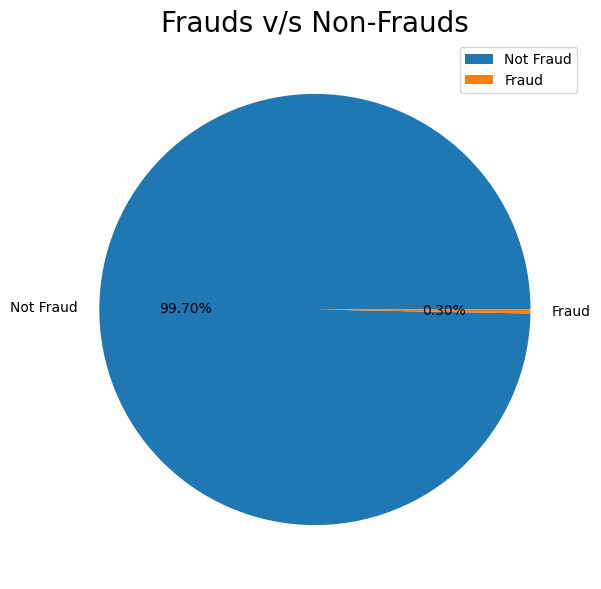

In [50]:
size = X.isFraud.value_counts().values
labels = ['Not Fraud', 'Fraud']

plt.pie(size, labels = labels, autopct = '%.2f%%')
plt.title('Frauds v/s Non-Frauds', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [51]:
Y = X['isFraud']
X = X.drop(['isFraud'], axis=1)

In [52]:
print(f"X Shape: {X.shape}")
print(f"Y Shape: {Y.shape}")

X Shape: (2770409, 10)
Y Shape: (2770409,)


As we can see from the pie chart above, the data is **imbalanced**.<br>
We can **oversample** the data using **SMOTE**.

### **Over-Sampling Using SMOTE**

In [54]:
x_oversampled, y_oversampled = SMOTE().fit_resample(X, Y.values.ravel())

print(f"X shape: {x_oversampled.shape}")
print(f"Y shape: {y_oversampled.shape}")

X shape: (5524392, 10)
Y shape: (5524392,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_oversampled, y_oversampled, test_size=0.2, random_state=0)

In [56]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (4419513, 10)
X_test Shape: (1104879, 10)
y_train Shape: (4419513,)
y_test Shape: (1104879,)


In [58]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## **Logistic Regression**

In [61]:
logistic_model = LogisticRegression(solver = 'liblinear', random_state=0)

In [62]:
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [63]:
logistic_pred = logistic_model.predict(X_test)

In [72]:
print('Logistic Regression Classification report:\n', classification_report(y_test, logistic_pred))
logistic_conf_mat = confusion_matrix(y_true=y_test, y_pred=logistic_pred)
print('Confusion matrix:\n', logistic_conf_mat)

Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95    553120
           1       0.94      0.95      0.95    551759

    accuracy                           0.95   1104879
   macro avg       0.95      0.95      0.95   1104879
weighted avg       0.95      0.95      0.95   1104879

Confusion matrix:
 [[522250  30870]
 [ 26011 525748]]


In [66]:
logistic_accuracy = accuracy_score(y_true=y_test, y_pred=logistic_pred)
print(f"Accuracy of the Logistic Regression Model: {logistic_accuracy}")

Accuracy of the Logistic Regression Model: 0.9485183445427056


## **AdaBoost Classifier**

In [68]:
ada_model = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=0)

In [70]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=500, random_state=0)

In [71]:
ada_pred = ada_model.predict(X_test)

In [73]:
print('AdaBoost Classification report:\n', classification_report(y_test, ada_pred))
ada_conf_mat = confusion_matrix(y_true=y_test, y_pred=ada_pred)
print('Confusion matrix:\n', ada_conf_mat)

AdaBoost Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    553120
           1       0.99      0.99      0.99    551759

    accuracy                           0.99   1104879
   macro avg       0.99      0.99      0.99   1104879
weighted avg       0.99      0.99      0.99   1104879

Confusion matrix:
 [[546983   6137]
 [  3200 548559]]


In [74]:
ada_accuracy = accuracy_score(y_true=y_test, y_pred=ada_pred)
print(f"Accuracy of the AdaBoost Classifier Model: {ada_accuracy}")

Accuracy of the AdaBoost Classifier Model: 0.9915493008736703


## **XGBoost Classifier**

In [83]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.01, random_state=0)

In [84]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [85]:
xgb_pred = xgb_model.predict(X_test)

In [86]:
print('XGBoost Classification report:\n', classification_report(y_test, xgb_pred))
xgb_conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_pred)
print('Confusion matrix:\n', xgb_conf_mat)

XGBoost Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553120
           1       0.99      1.00      1.00    551759

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879

Confusion matrix:
 [[550174   2946]
 [  2448 549311]]


In [87]:
xgb_accuracy = accuracy_score(y_true=y_test, y_pred=xgb_pred)
print(f"Accuracy of the XGBoost Classifier Model: {xgb_accuracy}")

Accuracy of the XGBoost Classifier Model: 0.9951180174480645


## Comparing the **Accuracies** of the Models
Evaluating the more accurate model(**XGBoost Classifier**) under **more metrics**

In [91]:
print("Model Accuracies: ")
print("XGBoost Classifier: {:.4f}".format(xgb_accuracy))
print("AdaBoost Classifier: {:.4f}".format(ada_accuracy))
print("Logistic Regression: {:.4f}".format(logistic_accuracy))

Model Accuracies: 
XGBoost Classifier: 0.9951
AdaBoost Classifier: 0.9915
Logistic Regression: 0.9485


#### **XGBoost Classifier gives better results**

Area under Precision Recall Curve Score in X_train

In [92]:
xgb_train_pred = xgb_model.predict(X_train)

In [93]:
auprc_train = average_precision_score(y_train, xgb_train_pred)
print("The Area under Precision Recall Curve Score For x_train is", auprc_train)

The Area under Precision Recall Curve Score For x_train is 0.9973706123481474


Area under Precision Recall Curve Score in X_test

In [94]:
auprc_test = average_precision_score(y_test, xgb_pred)
print("The Area under Precision Recall Curve Score For x_train is", auprc_test)

The Area under Precision Recall Curve Score For x_train is 0.9924681022381703


R2 Score

In [99]:
r2 = r2_score(y_test, xgb_pred)
print("R2 Score:", r2)

R2 Score: 0.9804720401614367


ROC AUC Score


In [100]:
roc_auc = roc_auc_score(y_test, xgb_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9951185652521604


ROC Curve

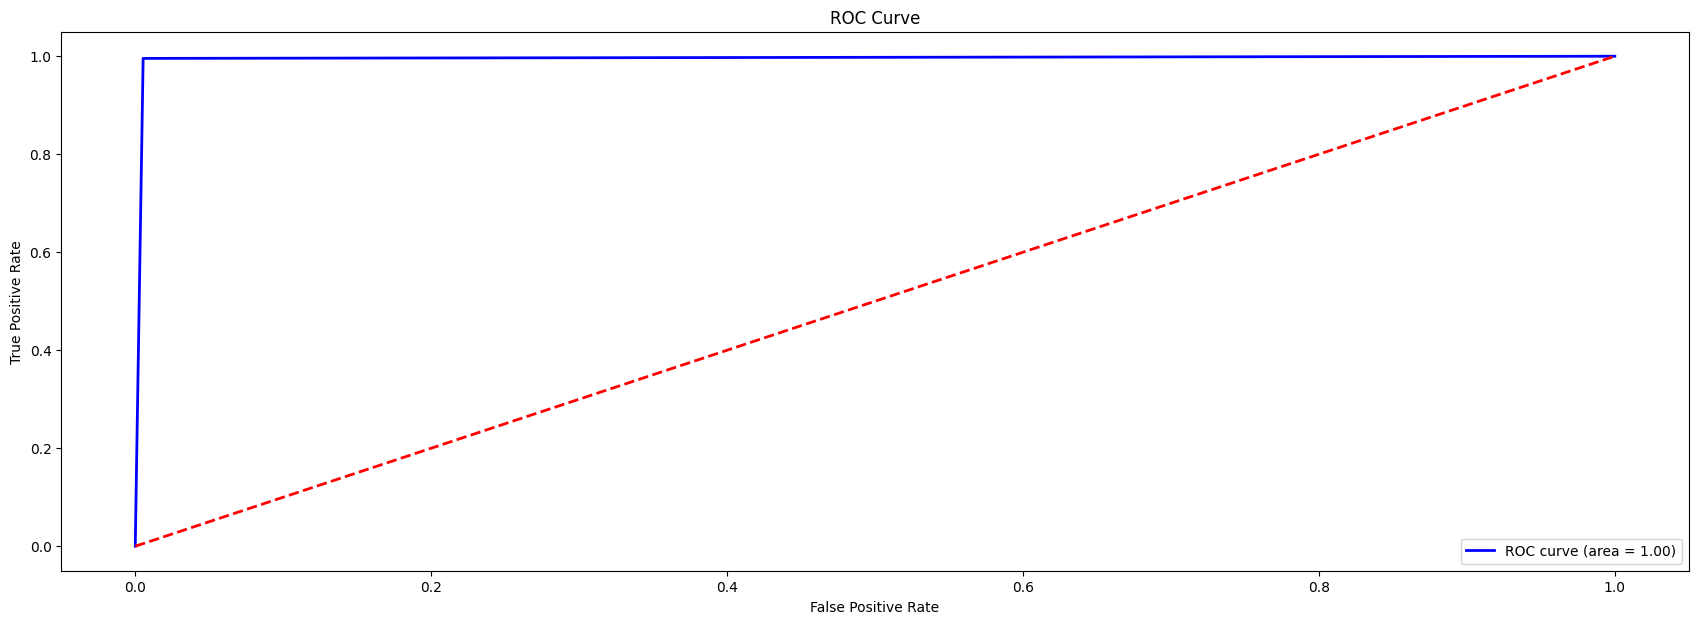

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

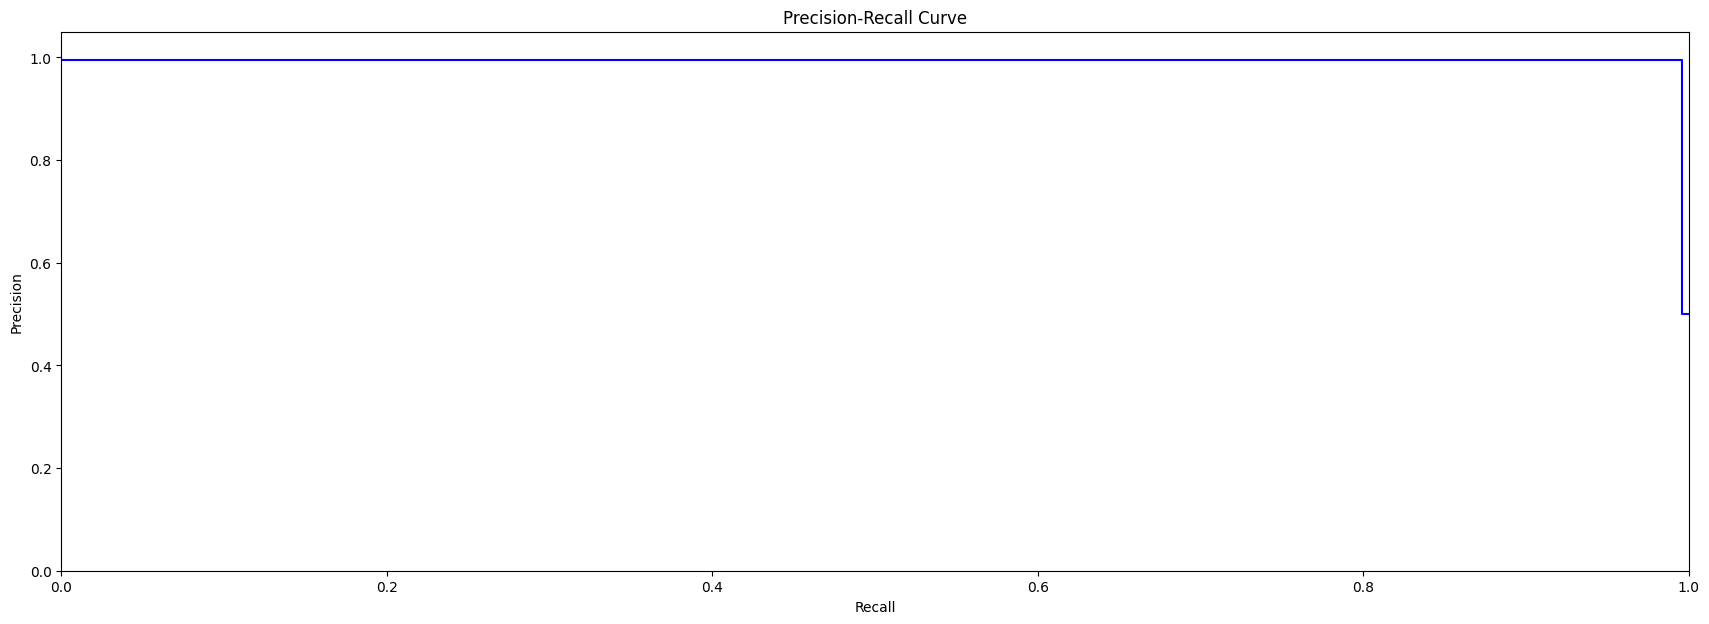

In [102]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_pred)

plt.figure()
plt.step(recall, precision, color='blue', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

### Classification Report

In [107]:
print("XGBoost Classifier Model Classification Report: ")
print(classification_report(y_true=y_test, y_pred=xgb_pred))

XGBoost Classifier Model Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553120
           1       0.99      1.00      1.00    551759

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879

